# 1. The Determinant
Recall that when we discussed linear transformations, some will stretch space out, while others squish it on in:

<img src="images/determinant-stretch.png" width="300">

<img src="images/determinant-squish.png" width="300">

One thing that turns out to be pretty useful when it comes to these transformations, it to measure exactly _how much_ it stretches or squishes things. More specifically, to measure the factor by which a given area increases or decreases:

<img src="images/det-area-1.png" width="300">
<img src="images/det-area-2.png" width="300">

For example look at the matrix below; it scales $\hat{i}$ by a factor of 3, and $\hat{j}$ by a factor of 2:

<img src="images/det-area-4.png" width="300">
<img src="images/det-area-3.png" width="300">

Now, if we focus our attention on the 1x1 square who's bottom sits on $\hat{i}$ and whose left side sits on $\hat{j}$:

<img src="images/det-area-5.png" width="300">

After the transformation, this turns into a 2x3 rectangle:

<img src="images/det-area-6.png" width="300">

Since this region started out with an area of 1, and ended up with an area of 6, we can say the linear transformation has _scaled its area_ by a factor of 6. Compare that to a shear whose matrix has the form:

#### $$
\begin{bmatrix}
    1  & 1\\
    0  & 1
\end{bmatrix}$$

In this case the original area, contained by the square of the two unit vectors, is slanted; yet its area does not change: 

<img src="images/det-area-7.png" width="300">
<img src="images/det-area-8.png" width="300">

This brings up to a **key point**:
> If you know how a single unit square's area changes, you can determine how the area of any possible region in space changes. 

For starters, whatever happens to one square in the grid, has to happen to any other square in the grid, no matter the size (this follows from the fact that grid lines must remain parallel and evenly spaced):

<img src="images/det-area-9.png" width="300">
<img src="images/det-area-10.png" width="300">

## 1.1 Determinant Definition
Now this very special scaling factor-the factor by which a linear transformation changes any area-is called the _**determinant**_ of a transformation. So, in the case of our earlier example:

#### $$det\Big(
\begin{bmatrix}
    3  & 2\\
    0  & 2
\end{bmatrix}\Big) = 6$$

Now, the _determinant_ of a transformation would be 3, if that transformation increases the area of a region by a factor of 3. It would be 1/2 if it squishes down all areas by a factor of 1/2. Finally, the determinant of a transformation is zero if it squishes all of space onto a line! Note, this will be relevant when we discuss eigenvectors. It means that checking if the determinant of a given matrix is zero will give a way of computing whether or not the transformation associated with that matrix squishes everything into a smaller dimension. 

We should also quickly mention that a determinant can be _negative_. This means that space has been inverted (visually we can think of it as being flipped). A simple way to check if this has happened is to note that $\hat{j}$ always starts to the left of $\hat{i}$. If, after a transformation, $\hat{i}$ is to the left of $\hat{j}$ then we know orientation has changed. The absolute value of the determinant will still tell us the factor by which the area has been scaled. 

You may (reasonably) ask, why does this negative area relate to orientation flipping? That is most easily explained with a beautiful visual, seen [here](https://youtu.be/Ip3X9LOh2dk?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&t=306).

## 1.2 Determinant Computation
You may still be wondering at this point, how we actually compute the determinant? While the actual computation is not nearly as important as the underlying meaning and what it represents, it is still useful to cover. We will define the computation as follows:

#### $$det\Big(
\begin{bmatrix}
    a  & b\\
    c  & d
\end{bmatrix}\Big) = ad - bc$$

---

# 2. Linear Systems of Equations & Inverse Matrices
Now one of the reasons that linear algebra is more broadly applicable, and is required for nearly all technical disciplines, is that it lets us solve certain _systems of equations_. Before digging into a few key points concerning systems of equations, let's look an example:

#### $$2x + 5y + 3z = -3$$
#### $$4x + 0y + 8z = 0$$
#### $$1x + 3y + 0z = 2$$

In this case we have two main entities: 
> 1. **A list of variables, which are unknown**.
2. **A list equations that relate these unknown variables.**

Now, there is a key point that is often glanced over, but it is crucial to keep in mind:
> A System of equations is meant to be treated as an entire _system_. It represents a given _situation_ or _scenario_ in which _all_ of the equations apply. These equations are meant to help define the current state of the world if you will, and in the current state of the world, these equations _all hold true_. This property of all equations in our system holding true means that there must be some set of unique values of the variables involved that make all equations in the system true at the same time. 

We can say this yet one final way:
> We are in a situation/scenario where all equations above hold for a certain $x, y$ and $z$. In order for them to all hold (since we are treating them as a system), we must find the $x, y$ and $z$ where they _intersect_!

## 2.1 Geometric Coordinate Space
Before digging into the linear algebra solution, it is important to have a good understanding of what is happening in _coordinate space_. Let's say we are dealing with the following system of equations:

#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

What this means is that our world is at a current state where both of these equations hold true! We can quickly plot the equations below:

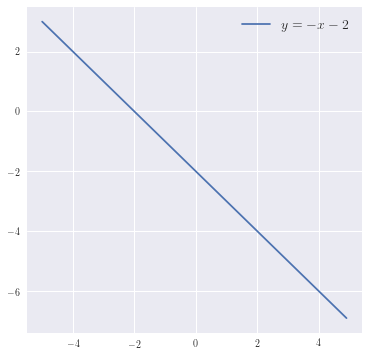

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
x = np.arange(-5, 5, 0.1)
y1 = (-2*x - 4) / 2
y2 = (-1*x - 1) / 3 
plt.plot(x, y1)
ax.legend([r'$y = -x - 2$'], fontsize=14, ncol=2)

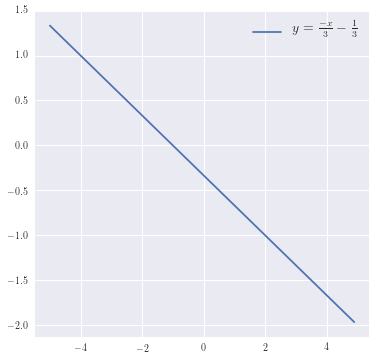

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y2)
ax.legend([r'$y = \frac{-x}{3} - \frac{1}{3}$'], fontsize=14, ncol=2)

Now, we can see our geometric representation of the equation's above-both straight lines. The fact that they are defined to be a system of equations means that they are both true at the same time (in our current state). Well, when do both equations have the same $x$ and $y$? When they _intersect_!

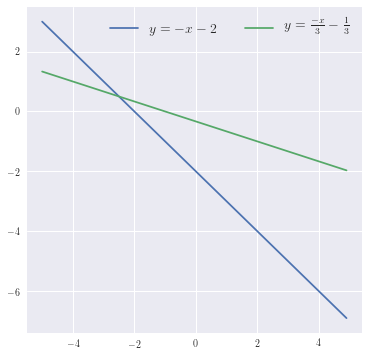

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, y1)
plt.plot(x, y2)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$'], fontsize=14, ncol=2)

We can see above that the intersection point-the point at which both equations have the same $x$ and $y$ values, and hence they are both true-is $x=-2.5$ and $y=0.5$. We can solve it by performing some simple algebraic manipulation, but for now what we really need is to just focus on the underlying geometry.

## 2.2 Linear Algebra View Point
Alright, we have just looked at what a system of equations represents from the perspective of geometric coordinate space. Now, there is an alternative view that is rather power. Let's try and view this system of equations through the lense of linear algebra. 

To begin, we can look at our system of equations again (the 3 dimensional case):

#### $$2x + 5y + 3z = -3$$
#### $$4x + 0y + 8z = 0$$
#### $$1x + 3y + 0z = 2$$

Recall, we did not _need_ to align the system this way; we chose to. The $x$, $y$, and $z$ vertically inline, with the constant on the right, was a choice on our part. Once that choice was made, however, we can see a few things that are rather interesting.

> 1. The left hand side of each equation is a _**linear combination**_ of the variables $x$, $y$, and $z$. 
2. We know that vectors can often be expressed as _linear combinations_ of basis vectors. 
3. It almost looks as though our left hand side could be expressed via matrix vector multiplication-and it can! 

We can express the left hand side of equation as matrix vector multiplication!

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} 
$$

To be clear about how we arrived here, let's actually work from this matrix represntation back to our coordinate space system of equations:

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} \longleftrightarrow A \vec{x} = \vec{v}
$$
#### $$\downarrow$$
#### $$
\begin{bmatrix}
    2 \\
    4 \\
    1 
\end{bmatrix} \cdot x + 
\begin{bmatrix}
    5 \\
    0 \\
    3 
\end{bmatrix} \cdot y +
\begin{bmatrix}
    3 \\
    8 \\
    0 
\end{bmatrix} \cdot z =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
#### $$\downarrow$$
#### $$
\begin{bmatrix}
    2x \\
    4x \\
    1x 
\end{bmatrix} + 
\begin{bmatrix}
    5y \\
    0y \\
    3y 
\end{bmatrix} +
\begin{bmatrix}
    3z \\
    8z \\
    0z 
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
#### $$\downarrow$$

#### $$
\begin{bmatrix}
    2x + 5y + 3z = -3 \\
    4x + 0y + 8z = 0 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$

We have just shown how these two representations-one in coordinate and one in vector space-are equivalent. From the linear algebra matrix-vector multiplication side of things, we can interpret it as follows:
> What vector $\begin{bmatrix}x \\y \\z\end{bmatrix}$ can be linearly transformed via the matrix: $\begin{bmatrix}2 & 5 & 3 \\4 & 0 & 8 \\1 & 3 & 0 \end{bmatrix}$ and result in the output vector: $\begin{bmatrix}-3 \\0 \\2\end{bmatrix}$? 

Now, the above is a vector space interpretation of our problem! It may feel a little strange at first, because it is living in a different space than our coordinate interpretation. 

### 2.2.1 Intuition
This next bit of intuition is seldom taught in courses, but I think you will find it rather useful. Even though we have proven above how we can switch back and forth between a geometric coordinate space (the system of equations) and a vector space (the matrix and vector), the question remains _how are they connected_? In other words:

> Why does solving a linear system of equations by methods of substitution end up being equivalent to finding the pre-transformation vector $\vec{x}$ in the equation $A\vec{x} = \vec{v}$? In other words, finding the vector $\vec{x}$ in the original vector space, that after being transformed via $A$, results in the vector $\vec{v}$

We can state this one more way, just to make sure we have run the gamut of ways to express this situation:

> Why does solving a linear system of equations by methods of substitution end up being equivalent to finding a linear combination of the _column vectors of $A$_ that give $\vec{v}$?

To fully understand this, we will approach the problem from two different angles; the theoretical angle and experimental angle. 

### 2.2.1.1 Intuition Theoretical
Let's look at our linear system of equations and matrix interpretation again:

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} \hspace{1cm} \longleftrightarrow \hspace{1cm}
\begin{bmatrix}
    2x + 5y + 3z = -3 \\
    4x + 0y + 8z = 0 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$

We have proven how we can shift back and forth between the vector space (left) and coordinate space (right). If we let (in the right hand side of our equation) the linear transformation matrix be $A$, the vector that is being transformed be $\vec{x}$, and the output/transformed vector be $\vec{v}$, then we can rewrite this as:

#### $$A \vec{x} = \vec{v}$$

What this is saying, is that $A$ will _transform_ $\vec{x}$ in such a way, that it lands on $\vec{v}$. From a functional notation perspective we would see that:

#### $$\vec{x} \rightarrow A(\vec{x}) \rightarrow \vec{v}$$
#### $$\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} \rightarrow A(\vec{x}) \rightarrow \begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix}$$

Which allows us to clearly see that, each coordinate of our original three dimensional vectors moves as follows:

#### $$\begin{bmatrix}
    x \rightarrow -3 \\
    y \rightarrow 0\\
    z \rightarrow 2
\end{bmatrix}$$

This brings up the _first hurdle_ that you may encounter when going through this (as I did). All seems fine and well at this point, the mechanical manipulation of the numbers is no problem, until you realize: _the order of the equations was arbitrary_. That gave me pause when first learning this. If the order of the equations is arbitrary, and we could have just as easily have grouped them as follows when we started: 

#### $$
\begin{bmatrix}
    4x + 0y + 8z = 0 \\
    2x + 5y + 3z = -3 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$

Then wouldn't that correspond to a _different matrix $A$_, and a _**different linear transformation**_? The answer is that _it would_! In this case, our transformation matrix would look like:

#### $$ A =
\begin{bmatrix}
    4 & 0 & 8 \\
    2 & 5 & 3 \\
    1 & 3 & 0 
\end{bmatrix}
$$

But wait! All is not lost. The order of the output vector $\vec{v}$ would of course change as well (because it of course would have had to when reordering our equations):

#### $$
\begin{bmatrix}
    4 & 0 & 8 \\
    2 & 5 & 3 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    0 \\
    -3 \\
    2
\end{bmatrix}
$$

Now we arrive at the _second hurdle_ that I encountered, and you may as well. The order of our vector $\vec{x}$ _does not change_. In other words, in our new ordering of the equations, we now have a transformation $A$ that takes $\vec{x}$ and moves it as follows:

#### $$\begin{bmatrix}
    x \rightarrow 0 \\
    y \rightarrow -3 \\
    z \rightarrow 2
\end{bmatrix}$$

What we are seeing is that _the ordering does not matter_! Yes our transformation matrix $A$ has changed, but the output vector $\vec{v}$ has changed also! This _new_ transformation will take our original $\vec{x}$ and move it to the _new_ $\vec{v}$. This means that we can still solve for our $\vec{x}$ without a problem! 

### 2.2.1.2 Intuition Theoretical - Key Point
Alright, I must confess that at this point I still had several gaps in my intuition surrounding this. I still was struggling to understand how one equation (of the 3 that make up the system):

#### $$2x + 5y + 3z = -3$$

Can relate to a _row_ from the matrix-vector representation. Now, this next bit of intuition will require a very solid understanding of linear transformation (I have another notebook on it-check it out). We can actually represent this equation as our original vector $\vec{x}$, transformed by a 1x3 matrix, into a 1-dimensional output:

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 
\end{bmatrix}
$$

This leads to a _very_ crucial point: 

> _**Each equation is a linear combination that yields one value.**_

Here, in coordinate space, the equation is a linear combination that will yield a single output. When we view it in vector space, we see that $\vec{x}$ is transformed from 3 dimensional space, to a single dimension (via the _dot product_). Stated again so we recognize how important this is:

> When we look at only _one_ row from the transformation matrix, we can view that as transforming $\vec{x}$ into 1 dimension! 

This has essentially allowed us to the find the transformed version of _one of the basis vectors_ (either $\hat{i}, \hat{j}$ or $\hat{k}$). 

**Most Crucial Point**<br>
And here is the best part of all! Because we don't simply have 1 equation, we have a _system_ of them, we are able to solve for the transformed versions of the remaining basis vectors as well! You may think: what transformed basis vector does the above 1 dimensional output represent? Well, it doesn't technically map to _any_ when performed on its own; it takes on its meaning once treated within the system. This corresponds nicely to the geometric approach where a single equation with 3 unknowns cannot be solved on its own. Only in _conjunction_ with 2 other equations can all 3 variables be solved for (since they place _constraints_ on state that we are in). 

As we saw earlier, we can change the order of the equations, which yields a different transformation matrix and output vector, however, the input vector remains the same! This is analogous to saying that we have a simple equation such as:

#### $$5 = x + 3$$

And then updating that to be:

#### $$8 = x + 6$$

We have changed the way in which we update the side with the variable (adding 3 and then adding 6), but our left hand side _is also updated_ to reflect this! The same thing is happening when we change the order of our equations, and subsequently get a different matrix. The operation (transformation) of our vector is altered, but the output is altered to match the alterered operation, keeping things in sync. 

A way to think about it is that we are _just trying to find linear combinations in **either space**_! 

### 2.2.1.1 Intuition Experimental

We are again will deal with the same system of equations that we looked at in the geometric coordinate space. 

#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

#### $$
\begin{bmatrix}
    2  & 2\\
    1  & 3
\end{bmatrix}
\begin{bmatrix}
    x \\
    y 
\end{bmatrix} = 
\begin{bmatrix}
    -4 \\
    -1
\end{bmatrix}$$
#### $$A \vec{x} = \vec{v}$$

Now, we can get a look at our system from a unique perspective by overlaying our linear algebra view point, with the geometric coordinate space viewpoint:

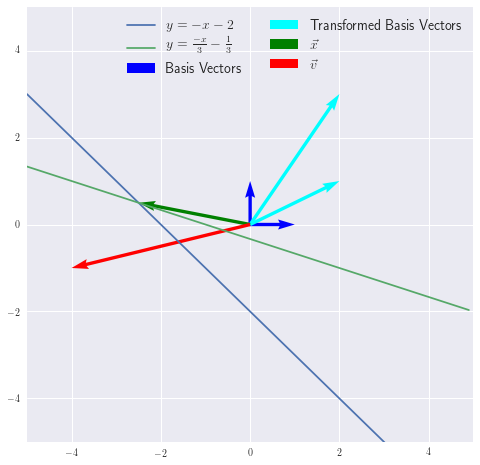

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
plt.rc('text', usetex=True)
# Basis vectors (i and j)
ax.quiver([0], [0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, color=['b'])

# Linearly transformed i and j
ax.quiver([0], [0], [2, 2], [1, 3], angles='xy', scale_units='xy', scale=1, color=['cyan'])


# x, pre transformation
ax.quiver([0], [0], [-2.5], [0.5], angles='xy', scale_units='xy', scale=1, color=['g'])

# v, (x post transformation)
ax.quiver([0], [0], [ -4], [-1], angles='xy', scale_units='xy', scale=1, color=['r'])

plt.plot(x, y1)
plt.plot(x, y2)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$', 
           'Basis Vectors', 'Transformed Basis Vectors', 
           r'$\vec{x}$', r'$\vec{v}$', 'hi'], fontsize=14, ncol=2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

It is clear that the original location of vector $\vec{x}$ has the exact same value as that of the intersection point of our two original equations! We can see where our original basis vectors are located, and where they lie after the linear transformation is applied. 

The only thing that seems to be left on it its own is our vector $\vec{v}$. We know that after we have performed the linear transformation $A$ that our vector $\vec{x}$ will land on $\vec{v}$. Keep in mind this alone is a pretty cool thing to realize. Consider looking at the original equations: 

#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

You may wonder to yourself: "What exactly do the -4 and -1 represent?". You may realize that in one equation we are saying:

> Scaling $x$ by 2 and adding it $y$ scaled by 2 will _always_ yield -4. This is, remember, by definition a linear combination. 

What is interesting though, however, is that the -4 in this equation doesn't show up in our geometric coordinate space. This begins to touch on something rooted very deeply in our understanding of math, that we will confront in the next section. For now, we can conclude that -4 and -1 don't show up in the plot, and they aren't part of either functions curve. What is very interesting is that they instead have a direct representation in our linear transformation! They represent the resulting vector that our intersection vector (-2.5, 0.5) ends up at after it has been transformed via the matrix A. 

With that said, we can go one step further to get a visual understanding of of how $\vec{v}$ fits in here. We can solve for the _inverse_ matrix, $A^{-1}$, and determine the equations associated with it. We can then plot those equations, and they should intersect at the tip of $\vec{v}$!

In [47]:
import numpy as np
A = np.array([[2, 2], [1, 3]])
b = np.array([-4, -1])

print('A: \n', A)

Ainv = np.linalg.inv(A)
print('A inverse: \n', Ainv)

A: 
 [[2 2]
 [1 3]]
A inverse: 
 [[ 0.75 -0.5 ]
 [-0.25  0.5 ]]


Hence, our equations associated with the $A^{-1}$ are:

#### $$.75*x - 0.5*y = -2.5$$
#### $$-0.25*x + 0.5*y = 0.5$$

Remember, $A^{-1}$ represents the transformation that will take $\vec{v}$ to the location of $\vec{x}$! So, we can write:

#### $$A^{-1}\vec{v} = \vec{x}$$

And that can be shown here:

In [53]:
Ainv.dot(b)

array([-2.5,  0.5])

And we can also add those two updated linear equations associated with our inverse transformation to our original plot! 

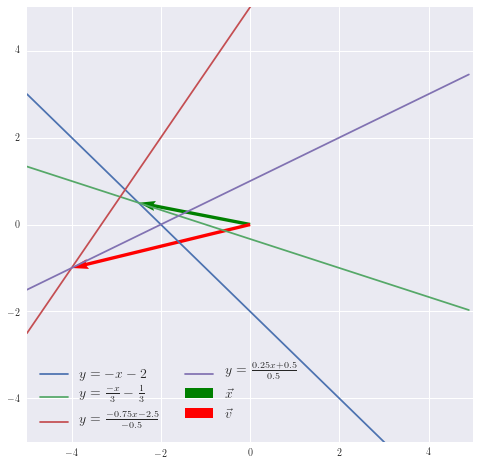

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
plt.rc('text', usetex=True)

# x, pre transformation
ax.quiver([0], [0], [-2.5], [0.5], angles='xy', scale_units='xy', scale=1, color=['g'])

# v, (x post transformation)
ax.quiver([0], [0], [ -4], [-1], angles='xy', scale_units='xy', scale=1, color=['r'])

plt.plot(x, y1)
plt.plot(x, y2)
ya = (-0.75*x - 2.5) / -0.5
yb = (0.25*x + 0.5)/0.5
plt.plot(x, ya)
plt.plot(x, yb)
ax.legend([r'$y = -x - 2$',r'$y = \frac{-x}{3} - \frac{1}{3}$', 
           r'$y = \frac{-0.75x - 2.5}{-0.5}$',r'$y = \frac{0.25x + 0.5}{0.5}$', 
           r'$\vec{x}$', r'$\vec{v}$', 'hi'], fontsize=14, ncol=2)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Awesome! We can see that the lines associated intersect at the location of $\vec{v}$!

## 2.2.2 One equation vs. One row in transformation matrix 
TODO: 
* Describe different between one equation and one row in transformation matrix 
* They are **two different systems**. Descartes.
* Really highlight the isomorphic nature of this system. Different way of representing something that yields the same result. This is FUNDAMENTAL

Leaving Off: Let's say we are in a scenario where we want to know what x and y are, for a given state of our world. We intially have _no idea_ what they are. However, we first learn that for the given our current state, a certain relationship holds true (a function concerning both x and y). This alone will only give us a line in the coordinate space, _or_ it will give us a transformation of a vector from 2 dimensions into one, _but_ we are not sure what the original vector values-it could be many! For instance, if the transformation was:

#### $$
\begin{bmatrix}
    2 & 5 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
\end{bmatrix} =
\begin{bmatrix}
    -3 
\end{bmatrix}
$$

There are multiple linear combinations that will satisfy this! For instance, $x = 1$ and $y = -1$. Or, $x = 6$ and $y = -3$. The list goes on and on. We _do not know_ which values of x and y correspond to our particular situation yet. By trying to solve the matrix vector multiplication at this point, we run into an issue of linear dependence: https://en.wikipedia.org/wiki/Linear_independence

Now, suddenly we are given _another_ relationship concerning $x$ and $y$ that holds true for our current state of the world. We have been given another _constraint_. Now, from a coordinate space perspective, we have been given another line. From the vector space, it is another transformation that is holding true in our current state. At this point, we have 2 linear combinations. Because we know that they _both currently are true_, we treat them as a system. This means that we can hold them in a 2x2 matrix and treat it as one whole transformation (instead of 2 separate ones that resemble the dot product). 

How does this relate back to linear dependence/independence? 

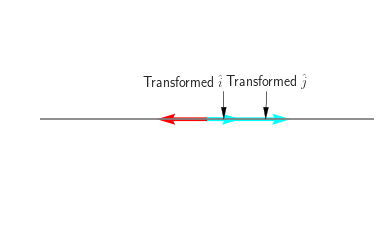

In [17]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)


# draw lines
xmin = -10
xmax = 10
y = 0
height = 1

plt.hlines(y, xmin, xmax, color='grey')

ax.quiver([0], [0], [2, 5], [0, 0], angles='xy', 
          scale_units='xy', scale=1, color='cyan', width=0.011)

ax.quiver([0], [0], [-3], [0], angles='xy', 
          scale_units='xy', scale=1, color='red', width=0.011)


plt.annotate(r'Transformed $\hat{i}$', (1,0), xytext = (1, 3), 
              arrowprops=dict(facecolor='black', width=0.01, headwidth=5), 
              horizontalalignment='right', fontsize=14)

plt.annotate(r'Transformed $\hat{j}$', (3.5,0), xytext = (6, 3), 
              arrowprops=dict(facecolor='black', width=0.01, headwidth=5), 
              horizontalalignment='right', fontsize=14)



plt.axis('off')
plt.show()

# Note
If we realize that the vector x,y is what we are looking for given our current state, we know that even if we change the order of the matrix (linear transformation) rows, we are still going to be transforming the _same_ vector x,y! That does not change, only the transformation changes, and the respective output vector! Hence we will still end up with the same x,y vector when solved. 

We are in a state where certain linear combinations (for specific values of x, y) are known to be true! By definition of linear combinations and linear transformations, we can express our system of equations as a linear transformation of the vector x,y. 

They are **two different systems**. Descartes.

---

# Appendix
This appendix will show how to use numpy to solve the following system of linear equations:
#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

#### $$
\begin{bmatrix}
    2  & 2\\
    1  & 3
\end{bmatrix}
\begin{bmatrix}
    x \\
    y 
\end{bmatrix} = 
\begin{bmatrix}
    -4 \\
    -1
\end{bmatrix}$$
#### $$A \vec{x} = \vec{v}$$


## A.1 Solve for $\vec{x}$

In [45]:
import numpy as np
A = np.array([[2, 2], [1, 3]])
v = np.array([-4, -1])

xvec = np.linalg.solve(A, v)
print(xvec)

[-2.5  0.5]


## A.2 Solve for $\vec{x}$, reverse order of rows in matrix $A$ and $\vec{v}$

In [46]:
Aflipped = np.array([[1, 3], [2, 2]])
v1 = np.array([-1, -4])

xvec1 = np.linalg.solve(Aflipped, v1)
print(xvec1)

[-2.5  0.5]
